In [1029]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import arch

import copy
import time

# Data Preprocess

S&P 500

In [382]:
spx = pd.read_csv(r"C:\Users\Kran\Desktop\data\sp500.csv", index_col="date")
spx.index = (spx.index / 100).astype(int)
spx["high"] = 0
spx["low"] = 0

In [385]:
posi = spx.index[spx.sprtrn >= 0]
nega = spx.index[spx.sprtrn < 0]
spx.loc[posi, "high"] = spx.loc[posi].sprtrn * 1.5
spx.loc[nega, "high"] = spx.loc[nega].sprtrn * 0.5
spx.loc[posi, "low"] = spx.loc[posi].sprtrn * 0.5
spx.loc[nega, "low"] = spx.loc[nega].sprtrn * 1.5

In [1147]:
datalist

PERMNO  SHRCD TICKER TRDSTAT SECSTAT        PRC       RET  \
      dateff                                                               
10001 201301  10001.0   11.0   EGAS       A       R    9.87000  0.062701   
      201302  10001.0   11.0   EGAS       A       R    9.94000  0.011651   
      201303  10001.0   11.0   EGAS       A       R   10.20000  0.030684   
      201304  10001.0   11.0   EGAS       A       R   10.33000  0.017157   
      201305  10001.0   11.0   EGAS       A       R   10.28000 -0.000484   
      201306  10001.0   11.0   EGAS       A       R   10.30000  0.006323   
      201307  10001.0   11.0   EGAS       A       R   10.42000  0.016019   
      201308  10001.0   11.0   EGAS       A       R   10.20000 -0.016795   
      201309  10001.0   11.0   EGAS       A       R   10.20000  0.004412   
      201310  10001.0   11.0   EGAS       A       R    9.97000 -0.018137   
      201311  10001.0   11.0   EGAS       A       R    8.58000 -0.134905   
      201312  10001.0   11.0   EGAS       A       R    8.03000 -0.058858   
      201401  10001.0   11.0   EGAS       A       R    9.17000  0.147572   
      201402  10001.0   11.0   EGAS       A       R    9.36000  0.025627   
      201403  10001.0   11.0   EGAS       A       R   10.06000  0.079594   
      201404  10001.0   11.0   EGAS       A       R   10.90000  0.087972   
      201405  10001.0   11.0   EGAS       A       R   10.49000 -0.033486   
      201406  10001.0   11.0   EGAS       A       R   10.54000  0.009056   
      201407  10001.0   11.0   EGAS       A       R   12.89000  0.227230   
      201408  10001.0   11.0   EGAS       A       R   11.28000 -0.121412   
      201409  10001.0   11.0   EGAS       A       R   11.81000  0.050975   
      201410  10001.0   11.0   EGAS       A       R   11.35000 -0.035140   
      201411  10001.0   11.0   EGAS       A       R   11.50000  0.017181   
      201412  10001.0   11.0   EGAS       A       R   11.02000 -0.037826   
      201501  10001.0   11.0   EGAS       A       R    9.75000 -0.115245   
      201502  10001.0   11.0   EGAS       A       R   10.10000  0.035897   
      201503  10001.0   11.0   EGAS       A       R    9.96000 -0.000495   
      201504  10001.0   11.0   EGAS       A       R   10.07000  0.011044   
      201505  10001.0   11.0   EGAS       A       R   10.00000 -0.006951   
      201506  10001.0   11.0   EGAS       A       R   10.30000  0.030000   
...               ...    ...    ...     ...     ...        ...       ...   
93436 201601  93436.0   11.0   TSLA       A       R  191.20000 -0.203367   
      201602  93436.0   11.0   TSLA       A       R  191.92999  0.003818   
      201603  93436.0   11.0   TSLA       A       R  229.77000  0.197155   
      201604  93436.0   11.0   TSLA       A       R  240.75999  0.047830   
      201605  93436.0   11.0   TSLA       A       R  223.23000 -0.072811   
      201606  93436.0   11.0   TSLA       A       R  212.28000 -0.049053   
      201607  93436.0   11.0   TSLA       A       R  234.78999  0.106039   
      201608  93436.0   11.0   TSLA       A       R  212.00999 -0.097023   
      201609  93436.0   11.0   TSLA       A       R  204.03000 -0.037640   
      201610  93436.0   11.0   TSLA       A       R  197.73000 -0.030878   
      201611  93436.0   11.0   TSLA       A       R  189.39999 -0.042128   
      201612  93436.0   11.0   TSLA       A       R  213.69000  0.128247   
      201701  93436.0   11.0   TSLA       A       R  251.92999  0.178951   
      201702  93436.0   11.0   TSLA       A       R  249.99001 -0.007701   
      201703  93436.0   11.0   TSLA       A       R  278.29999  0.113244   
      201704  93436.0   11.0   TSLA       A       R  314.07001  0.128530   
      201705  93436.0   11.0   TSLA       A       R  341.01001  0.085777   
      201706  93436.0   11.0   TSLA       A       R  361.60999  0.060409   
      201707  93436.0   11.0   TSLA       A       R  323.47000 -0.105473   
      201708  93436.0   11.0   TSLA       A       R  355.89999 

Fama French

In [26]:
# Note: Use Fama Data Date as Trading Date List, Some Dates in Stock Data are NOT Trading Days
fama = pd.read_csv(r"C:\Users\Kran\Desktop\data\FamaFrenchMonth.csv", index_col="dateff")
# Use Month Time YYYYMM as Date Index
fama.index = (fama.index / 100).astype(int)
tradingdate = fama.index

In [120]:
fama = fama[fama.index > 200700]

In [194]:
# Take TradingDate After Year 2009
tradingdate = tradingdate[tradingdate > 200900]
tradingdate = tradingdate[tradingdate <= 201806]

Stock Specific Data

In [530]:
data = pd.read_csv(r"C:\Users\Kran\Desktop\data\MarketMonth.csv", dtype=dict(zip(['PERMNO', 'date', 'TICKER', 'TRDSTAT', 'SECSTAT', 'DLSTCD', 'PRC', 'RET', 'SHROUT'], [int, int, str, str, str, float, str, str])))
# Use Month Time YYYYMM as Date Index
data["date"] = (data.date / 100).astype(int)

In [531]:
data["PRC"] = data.PRC.astype(float)
data["PRC"] = data.PRC.abs()

In [532]:
# Special Character "B" and "C" in columns
data["RET"] = data.RET.replace({"B": "-100", "C": "-200"})
data["RET"] = data.RET.astype(float)
# Here Replaced by Nan
data.loc[data[data["RET"] < -99].index, "RET"] = np.nan

In [533]:
data["SHROUT"] = data.SHROUT.astype(float)

In [534]:
# Drop Unused Columns
data = data.drop(["PERMCO", "ALTPRC", "ALTPRCDT"], axis=1)
data = data.dropna()

In [535]:
# Find and Drop Stock with 2 or More SHRCD
cnt = data.drop_duplicates(["PERMNO", "SHRCD"]).groupby("PERMNO").count()
idx = cnt[cnt.date > 1].index
data = data[~data.PERMNO.isin(idx)]

In [547]:
# Only Select SRHCD = 11
data["SHRCD"] = data.SHRCD.astype(int)
data = data[data.SHRCD == 11]
#data = data.drop("SHRCD", axis=1)

In [551]:
# Split Data by PERMNO
datalist = [(companyid, companytable.sort_values("date").set_index("date")) for companyid, companytable in data.groupby("PERMNO")]
datalist = dict(datalist)

In [552]:
stkid = list(datalist.keys())

In [553]:
for key in datalist.keys():
    datalist[key].iloc[0: 6] = np.nan
    datalist[key] = datalist[key].reindex(fama.index)

In [554]:
# Backup
datalistback = copy.deepcopy(datalist)

# Check Anomaly

In [16]:
# EXAMPLE
# How to Do Something in the DICT
# Here Check Whether TICKER is Constant
check = [(key, (table.TICKER == table.TICKER.iloc[0]).all()) for key, table in datalist.items()]

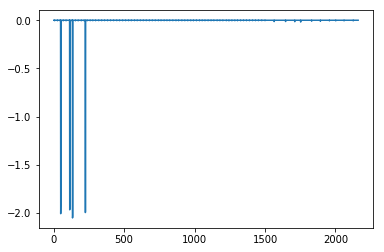

In [21]:
# EXAMPLE
# Check Divident
temp = datalist[stkid[0]].copy()
# Note Here, Better to Use Copy
temp["cmp"] = temp.PRC / temp.PRC.shift(1) - 1 -temp.RET
temp.cmp.plot(use_index=False)
plt.show()

In [22]:
temp[temp.cmp < -1]

,PERMNO,TICKER,TRDSTAT,SECSTAT,DLSTCD,PRC,RET,SHROUT,cmp
date,,,,,,,,,
20090317,10001.0,EWST,A,R,NaN,-8.025,0.003125,4297.0,-2.006250
20090318,10001.0,EWST,A,R,NaN,7.620,-0.050467,4297.0,-1.899066
20090617,10001.0,EWST,A,R,NaN,-8.620,-0.017104,4354.0,-1.965792
20090618,10001.0,EWST,A,R,NaN,8.360,-0.030162,4354.0,-1.939676
20090716,10001.0,EWST,A,R,NaN,-8.405,0.025000,4301.0,-2.050000
20090717,10001.0,EWST,A,R,NaN,8.540,0.016062,4301.0,-2.032124
20091123,10001.0,EGAS,A,R,NaN,-8.825,-0.002825,4361.0,-1.994350
20091124,10001.0,EGAS,A,R,NaN,8.750,-0.008499,4361.0,-1.983002


In [135]:
temp.loc[49:]

,PERMNO,date,TICKER,TRDSTAT,SECSTAT,DLSTCD,PRC,RET,SHROUT,cmp
49,10001,20090316,EWST,A,R,NaN,8.0000,0.001252,4297.0,-4.355444e-07
50,10001,20090317,EWST,A,R,NaN,-8.0250,0.003125,4297.0,-2.006250e+00
51,10001,20090318,EWST,A,R,NaN,7.6200,-0.050467,4297.0,-1.899066e+00
52,10001,20090319,EWST,A,R,NaN,7.7200,0.013123,4297.0,3.595801e-07
53,10001,20090320,EWST,A,R,NaN,7.4300,-0.037565,4297.0,2.331606e-07
54,10001,20090323,EWST,A,R,NaN,7.0200,-0.055182,4297.0,3.041723e-07
55,10001,20090324,EWST,A,R,NaN,7.5200,0.071225,4297.0,7.122507e-08
56,10001,20090325,EWST,A,R,NaN,7.7600,0.031915,4297.0,-1.063830e-07
57,10001,20090326,EWST,A,R,NaN,7.5000,-0.033505,4297.0,-1.546392e-07
58,10001,20090327,EWST,A,R,NaN,7.7000,0.026667,4297.0,-3.333333e-07


# CAPM Weight

In [558]:
for key in datalist.keys():
    print(key)
    y = datalist[key].RET - fama.rf
    x = fama.mktrf
    mod = [sm.OLS(y.iloc[shift - 60: shift], sm.add_constant(x.iloc[shift - 60: shift])).fit() for shift in range(60, len(y) + 1)]
    datalist[key]["alpha"] = [np.nan] * 59 + [iter_model.params[0] for iter_model in mod]
    datalist[key]["beta"] = [np.nan] * 59 + [iter_model.params[1] for iter_model in mod]
    datalist[key]["hsigma"] = [np.nan] * 59 + [iter_model.resid.std() for iter_model in mod]

10001
10002
10025
10026
10028
10032
10042
10044
10051
10078
10092
10100
10104
10107
10116
10119
10137
10138
10143
10145
10147
10158
10163
10180
10182
10200
10205
10220
10225
10232
10238
10239
10252
10253
10257
10258
10259
10271
10272
10290
10294
10297
10299
10302
10304
10308
10318
10324
10353
10355
10363
10371
10375
10382
10383
10395
10397
10404
10421
10443
10463
10501
10507
10514
10516
10517
10530
10547
10550
10562
10563
10568
10574
10586
10597
10606
10623
10629
10638
10644
10645
10649
10656
10657
10659
10661
10667
10682
10693
10696
10709
10769
10772
10777
10779
10781
10785
10812
10822
10825
10838
10843
10853
10860
10866
10874
10881
10886
10890
10892
10901
10909
10913
10916
10924
10932
10933
10942
10966
10974
10994
11006
11018
11038
11043
11048
11056
11081
11131
11132
11137
11144
11154
11157
11161
11162
11174
11208
11246
11267
11278
11285
11292
11293
11306
11308
11343
11348
11353
11368
11369
11370
11378
11379
11382
11384
11389
11393
11394
11396
11397
11402
11403
11404
11406
11415
1142

15667
15694
15703
15707
15709
15710
15720
15721
15724
15729
15774
15775
15776
15779
15780
15784
15785
15786
15787
15788
15793
15795
15797
15802
15824
15826
15831
15832
15833
15834
15837
15838
15840
15847
15850
15853
15854
15856
15858
15859
15860
15863
15902
15905
15906
15912
15914
15917
15921
15934
15937
15943
15948
15950
15955
15956
15960
15961
15970
15976
15978
15980
15991
15995
15996
15997
15998
15999
16000
16001
16004
16005
16007
16008
16012
16019
16020
16021
16024
16030
16044
16049
16051
16052
16063
16064
16066
16067
16068
16069
16070
16073
16076
16082
16083
16084
16086
16087
16090
16097
16099
16100
16104
16106
16108
16111
16112
16119
16126
16140
16144
16145
16146
16149
16154
16158
16160
16162
16164
16170
16171
16173
16174
16175
16178
16179
16181
16182
16183
16186
16188
16189
16247
16249
16250
16252
16253
16255
16260
16261
16263
16267
16268
16276
16277
16278
16279
16282
16284
16285
16287
16290
16303
16304
16308
16309
16310
16318
16319
16338
16343
16347
16350
16376
16377
16378
1638

65306
65307
65330
65365
65402
65429
65509
65518
65541
65665
65700
65752
65787
65832
65875
66050
66078
66093
66114
66130
66157
66181
66245
66253
66325
66368
66376
66384
66617
66683
66739
66747
66800
66852
67002
67010
67029
67046
67193
67360
67459
67467
67723
67838
67847
67862
67942
68144
68145
68196
68233
68276
68292
68304
68320
68340
68523
68591
68718
68742
68830
68857
69032
69199
69200
69411
69586
69649
69796
70033
70092
70228
70308
70332
70500
70519
70536
70578
70616
70704
70923
70965
71116
71175
71176
71191
71271
71395
71475
71538
71563
71685
71782
71837
71942
71985
72005
72119
72128
72232
72304
72338
72486
72494
72611
72696
72726
72733
72741
72980
72996
73139
73219
73681
73809
73817
74406
74500
74529
74740
74836
74908
74932
75033
75034
75066
75069
75070
75083
75100
75101
75104
75107
75110
75150
75162
75175
75176
75182
75186
75188
75215
75216
75222
75224
75233
75241
75257
75261
75272
75285
75316
75320
75326
75342
75383
75432
75433
75434
75435
75444
75447
75460
75470
75489
75494
7550

83896
83897
83903
83906
83908
83910
83916
83928
83929
83931
83934
83939
83944
83946
83950
83953
83956
83957
83961
83965
83969
83974
83976
83982
83989
83991
84001
84005
84007
84010
84020
84023
84026
84030
84031
84032
84036
84041
84042
84052
84056
84057
84058
84060
84062
84067
84069
84073
84084
84098
84103
84104
84108
84110
84111
84120
84129
84131
84134
84140
84146
84157
84161
84162
84164
84168
84172
84176
84184
84185
84203
84210
84215
84226
84234
84255
84260
84262
84275
84280
84281
84291
84302
84309
84311
84315
84319
84320
84321
84325
84330
84331
84342
84345
84348
84351
84364
84365
84372
84373
84375
84381
84385
84387
84389
84395
84397
84402
84403
84413
84416
84420
84426
84438
84441
84511
84514
84516
84519
84521
84529
84530
84531
84534
84546
84553
84555
84559
84561
84562
84563
84565
84571
84578
84581
84584
84588
84597
84599
84604
84606
84607
84616
84624
84625
84636
84644
84649
84656
84669
84721
84723
84725
84730
84734
84737
84738
84742
84746
84749
84757
84761
84763
84769
84776
84779
8478

89948
89952
89954
89956
89958
89960
89961
89964
89967
89968
89971
89973
89978
89979
89986
90006
90007
90011
90012
90013
90016
90017
90020
90022
90023
90024
90025
90026
90028
90029
90031
90032
90033
90034
90037
90038
90039
90044
90045
90049
90051
90052
90053
90054
90055
90058
90065
90067
90069
90071
90078
90079
90080
90081
90082
90083
90084
90085
90086
90088
90090
90091
90093
90096
90097
90098
90099
90101
90110
90122
90125
90126
90127
90128
90129
90132
90133
90134
90135
90136
90137
90158
90159
90162
90163
90164
90165
90169
90170
90171
90175
90176
90177
90178
90179
90180
90183
90184
90187
90188
90192
90194
90196
90197
90199
90200
90204
90207
90209
90210
90212
90213
90215
90216
90218
90220
90221
90222
90223
90224
90229
90231
90232
90233
90237
90238
90239
90241
90243
90245
90248
90249
90270
90272
90273
90274
90275
90276
90277
90280
90281
90283
90285
90286
90287
90288
90290
90292
90294
90295
90299
90303
90308
90309
90311
90312
90313
90314
90317
90319
90321
90322
90323
90325
90327
90331
9033

93300
93301
93302
93304
93305
93307
93310
93311
93312
93313
93317
93323
93330
93339
93344
93345
93346
93347
93348
93349
93351
93352
93353
93355
93356
93358
93368
93369
93371
93372
93373
93374
93382
93384
93387
93391
93392
93393
93395
93397
93398
93399
93400
93401
93402
93405
93418
93420
93422
93423
93426
93428
93429
93430
93432
93433
93434
93435
93436


In [559]:
datalistback = copy.deepcopy(datalist)

In [560]:
datalist[10001]

,PERMNO,SHRCD,TICKER,TRDSTAT,SECSTAT,PRC,RET,SHROUT,alpha,beta,hsigma
dateff,,,,,,,,,,,
200701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200707,10001.0,11.0,EWST,A,R,14.1500,-0.056667,2859.0,NaN,NaN,NaN
200708,10001.0,11.0,EWST,A,R,14.5400,0.027562,2859.0,NaN,NaN,NaN
200709,10001.0,11.0,EWST,A,R,13.9100,-0.032325,2856.0,NaN,NaN,NaN


# Construct Factor

In [561]:
def AddLogSizeFactor(df):
    '''Shares outstanding "SHROUT" and closing price "PRC" in df are REQUIRED'''
    try:
        df["LogSize"] = np.log(df.SHROUT * df.PRC * 1000)
    except Exception as e:
        print("Failed to Construct LogSize for Stock " + df.TICKER.iloc[-1])
        print(str(e))

In [562]:
def AddMomentumFactor(df, fama):
    '''Daily return "RET" in df and daily risk-free return "rf" in fama are REQUIRED'''
    try:
        #df["Momentum"] = (np.sum(np.log(df.RET + 1) - np.log(fama.rf + 1))).rolling(252).sum()
        df["Momentum"] = (np.log(df.RET + 1) - np.log(fama.rf + 1)).rolling(12).sum()
    except Exception as e:
        print("Failed to Construct Momentum for Stock " + df.TICKER.iloc[-1])
        print(str(e))        

In [563]:
# Add Factors
for table in datalist.values():
    AddLogSizeFactor(table)
    AddMomentumFactor(table, fama)

In [142]:
# Note Here, All the Data is Assumed to be Available at the End of the Month

In [573]:
tradingdate = tradingdate[tradingdate > 201300]

In [574]:
# Take Data After Year of 2009
for key in datalist.keys():
    datalist[key] = datalist[key].reindex(tradingdate)

In [576]:
# Backup
datalistback = copy.deepcopy(datalist)

In [195]:
datalist = copy.deepcopy(datalistback)

# Fama-Macbeth Regression

In [579]:
# Convert Data to Multi-Index Data
datalist = pd.concat(datalist.values(), keys=datalist.keys())

In [951]:
factorname = ["LogSize", "Momentum"]
regression = ["hsigma", "RET"] + factorname
daynum = len(tradingdate)
stknum = len(stkid)

In [979]:
dataview = datalist[regression].copy()
# Use Factor of Last Day
dataview[factorname] = dataview[factorname].groupby(level=0).shift(1)
# Hsigma Used in Weighting
dataview["hsigma"] = dataview["hsigma"].groupby(level=0).shift(1)
dataview["hsigma"] = dataview.hsigma ** -2

In [791]:
# EXAMPLE
# How to Extract Data for a Certain Date
dataview.iloc[[i * daynum + 10 for i in range(stknum)]].dropna()

,,hsigma,RET,LogSize,Momentum
,dateff,,,,
10001,201311,355.729280,-0.134905,18.454201,0.048384
10025,201311,98.315314,-0.132279,19.623087,-0.073357
10026,201311,308.077370,0.004090,21.192138,0.409972
10032,201311,89.433081,0.054598,20.974964,0.352229
10044,201311,169.749812,0.065457,18.166445,0.211571
10051,201311,116.991382,0.058311,20.966697,0.369795
10104,201311,336.605287,0.053433,25.751577,0.087447
10107,201311,358.690401,0.084875,26.412137,0.245621
10116,201311,30.706177,0.011765,18.224026,0.118318


In [980]:
# Generate View for Each Regression
index = pd.Index([i * daynum for i in range(stknum)])
regview = {tradingdate[shift]: dataview.iloc[index + shift].dropna().reset_index(level=1, drop=1) for shift in range(daynum)}

In [981]:
for key, iter_view in regview.items():
    # Standardize in Cross Section, and Kick out 3 quantile plus & minus
    regview[key][factorname] = ((regview[key][factorname] - regview[key][factorname].mean()) / regview[key][factorname].std()).values
    regview[key] = regview[key][(regview[key][factorname].abs() < 2.5).any(axis=1)]
    # Drop Extreme Return
    regview[key] = iter_view[(iter_view.RET >= iter_view.RET.quantile(0.025)).values & (iter_view.RET <= iter_view.RET.quantile(0.975)).values]
# Regress! With Weight of Hsigma ** -2
#regresult = {key: sm.GLS(iter_view.RET, iter_view[factorname].clip(lower=iter_view[factorname].quantile(0.025), upper=iter_view[factorname].quantile(0.975), axis=1), iter_view.hsigma.clip(upper=iter_view.hsigma.quantile(0.99))).fit() for key, iter_view in regview.items() if len(iter_view) > len(factorname)}
regresult = {key: sm.GLS(iter_view.RET, iter_view[factorname], iter_view.hsigma.clip(upper=iter_view.hsigma.quantile(0.99))).fit() for key, iter_view in regview.items() if len(iter_view) > len(factorname)}

Factor Return

In [982]:
# Get Factor Return
# Return is Assumed to be Available at the End of Month
factorreturn = {key: value.params for key, value in regresult.items()}
factorreturn = pd.concat(factorreturn, axis=1).transpose().reindex(tradingdate)

In [983]:
# Factor Return Correlation
factorreturn.corr()

,LogSize,Momentum
LogSize,1.000000,-0.087216
Momentum,-0.087216,1.000000


In [984]:
# T Statistics
factorreturn.mean() / factorreturn.std() * np.sqrt(len(factorreturn.dropna()))

LogSize     2.226373
Momentum    1.093712
dtype: float64

In [985]:
# Plot Range Setting
rng = range(0, len(factorreturn), 5)

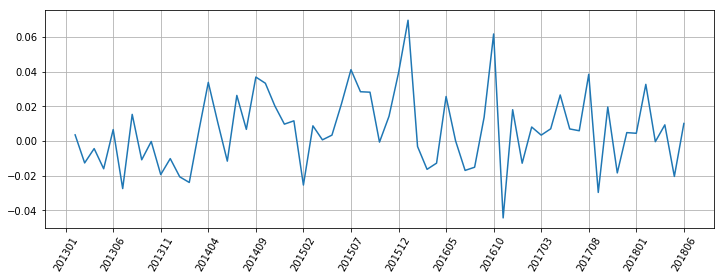

In [986]:
plt.figure(figsize=(12, 4))
plt.plot(factorreturn.LogSize.reset_index(drop=1))
plt.xticks(rng, factorreturn.index[rng], rotation=60)
plt.grid()
plt.show()

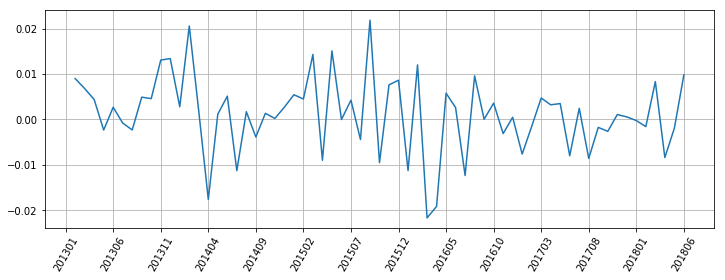

In [987]:
plt.figure(figsize=(12, 4))
plt.plot(factorreturn.Momentum.reset_index(drop=1))
plt.xticks(rng, factorreturn.index[rng], rotation=60)
plt.grid()
plt.show()

In [1019]:
# Fitted R-Square
rsq = {key: value.rsquared for key, value in regresult.items()}
rsq = pd.Series(rsq).reindex(tradingdate)

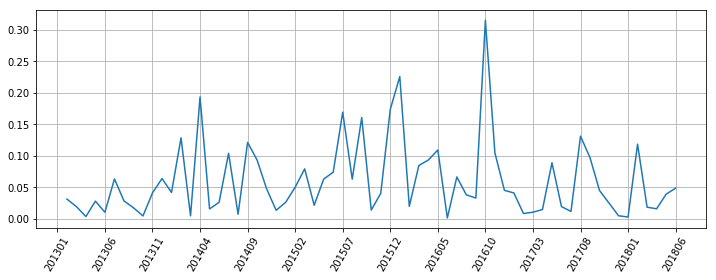

In [1020]:
plt.figure(figsize=(12, 4))
plt.plot(rsq.reset_index(drop=1))
plt.xticks(rng, rsq.index[rng], rotation=60)
plt.grid()
plt.show()

In [1021]:
rsq.mean()

0.06043415449473812

In [670]:
(rsq.mean() - 0.13) / rsq.std() * len(rsq)

1.8026793742617166

Specific Risk

In [995]:
# Generate View for Each Regression
index = pd.Index([i * daynum for i in range(stknum)])
fullview = {tradingdate[shift]: dataview.iloc[index + shift].reset_index(level=1, drop=1) for shift in range(daynum)}

# Standardize
for key in fullview.keys():
    fullview[key][factorname] = (fullview[key][factorname] - fullview[key][factorname].mean()) / fullview[key][factorname].std()

# Generate Residual
residual = [fullview[iter_date].RET - fullview[iter_date][factorname].dot(factorreturn.loc[iter_date].transpose()) for iter_date in tradingdate]
residual = pd.concat(residuala, axis=1).transpose()
residual.index = tradingdate

# Specific Risk
residrisk = residual.ewm(halflife=24, min_periods=0).std()

Covariance Matrix

In [1022]:
factorcov = factorreturn.ewm(halflife=90, min_periods=20).cov()
factorcov.index.names = ["date", "factor"]

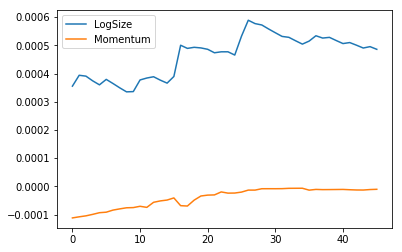

In [1024]:
factorcov.xs("LogSize", level="factor").dropna().plot(use_index=False)
plt.show()

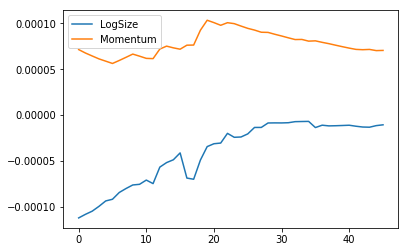

In [1025]:
factorcov.xs("Momentum", level="factor").dropna().plot(use_index=False)
plt.show()

# Historic Forecast

In [996]:
#forecast_facrtn = factorreturn.ewm(halflife=504, min_periods=504).mean()
# Shift by 1, Use Return Available Today, Multiply Factor Today
forecast_facrtn = factorreturn.copy()
forecast_facrtn = forecast_facrtn.shift(1)
forecast_facrtn = {forecast_facrtn.index[i]: forecast_facrtn.iloc[i] for i in range(len(forecast_facrtn))}

In [967]:
dataview

hsigma       RET    LogSize  Momentum
      dateff                                           
10001 201301         NaN  0.062701        NaN       NaN
      201302  230.119466  0.011651  18.203887 -0.069989
      201303  230.694268  0.030684  18.210954 -0.063398
      201304  233.524450  0.017157  18.236775 -0.080784
      201305  236.988594 -0.000484  18.277603 -0.048659
      201306  323.477798  0.006323  18.272751  0.039090
      201307  323.693168  0.016019  18.304867  0.073098
      201308  329.126607 -0.016795  18.476416  0.079628
      201309  330.516789  0.004412  18.477008  0.075182
      201310  357.421795 -0.018137  18.477008  0.079184
      201311  355.729280 -0.134905  18.454201  0.048384
      201312  339.564440 -0.058858  18.311738 -0.049860
      201401  377.470950  0.147572  18.245488 -0.095073
      201402  333.960009  0.025627  18.378241 -0.018239
      201403  343.344369  0.079594  18.398749 -0.004518
      201404  355.210495  0.087972  18.470871  0.041844
      201405  341.238369 -0.033486  18.554505  0.109148
      201406  337.878563  0.009056  18.516165  0.075573
      201407  338.182407  0.227230  18.520920  0.078285
      201408  269.046634 -0.121412  18.722194  0.267152
      201409  248.526656  0.050975  18.588774  0.154651
      201410  246.402458 -0.035140  18.634689  0.199967
      201411  245.181129  0.017181  18.594960  0.182498
      201412  245.273376 -0.037826  18.608089  0.344449
      201501  268.630492 -0.115245  18.565454  0.366550
      201502  254.034222  0.035897  18.443010  0.106457
      201503  253.736335 -0.000495  18.478278  0.116421
      201504  253.748559  0.011044  18.460881  0.039341
      201505  269.762247 -0.006951  18.471865 -0.033991
      201506  270.145725  0.030000  18.468327 -0.006907
...                  ...       ...        ...       ...
93436 201601   38.516611 -0.203367  24.174627  0.076057
      201602   38.433469  0.003818  23.952057 -0.063039
      201603   38.622100  0.197155  23.955867 -0.058150
      201604   38.886044  0.047830  24.149369  0.195948
      201605   39.060858 -0.072811  24.196740  0.062342
      201606   38.760488 -0.049053  24.217833 -0.117255
      201607   38.636969  0.106039  24.170730 -0.235053
      201608   38.653292 -0.097023  24.276086 -0.126571
      201609   38.303370 -0.037640  24.177693 -0.162462
      201610   38.285037 -0.030878  24.143246 -0.198376
      201611   38.265634 -0.042128  24.112321 -0.047281
      201612   37.997735  0.128247  24.069767 -0.197250
      201701   38.530018  0.178951  24.264920 -0.118256
      201702   38.353156 -0.007701  24.430219  0.273430
      201703   38.220526  0.113244  24.422489  0.261689
      201704   38.100656  0.128530  24.545076  0.188919
      201705   38.365406  0.085777  24.666577  0.262714
      201706   38.436346  0.060409  24.748873  0.420107
      201707   38.449905 -0.105473  24.823250  0.528659
      201708   38.482783  0.100257  24.711934  0.315914
      201709   38.420790 -0.041585  24.807477  0.512817
      201710   38.158659 -0.028056  24.771751  0.508009
      201711   38.018262 -0.068410  24.743592  0.510217
      201712   38.127374  0.008095  24.672729  0.481696
      201801   38.142502  0.137980  24.685125  0.368494
      201802   38.107991 -0.031752  24.814380  0.332424
      201803   38.460470 -0.224246  24.782841  0.307188
      201804   37.190796  0.104347  24.533822 -0.054909
      201805   40.698506 -0.031201  24.633336 -0.077470
      201806   66.933598  0.204474  24.601638 -0.192263

[454674 rows x 4 columns]

In [997]:
dataview["RetForecast"] = np.nan
for shift, date in enumerate(tradingdate):
    dataview.values[index + shift, 4] = fullview[date][factorname].dot(forecast_facrtn[date].transpose()).reindex(stkid).values

In [998]:
dataview["se"] = (dataview.RET - dataview.RetForecast) ** 2
dataview["ss"] = dataview.RET ** 2
ss = dataview[["se", "ss"]].dropna().groupby(level=1).sum()

In [999]:
(1 - ss.se / ss.ss).mean() / (1 - ss.se / ss.ss).std() * np.sqrt(len(ss))

-4.889424045071451

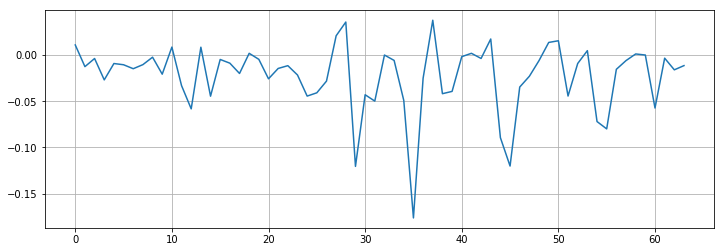

In [1000]:
(1 - ss.se / ss.ss).plot(use_index=False, figsize=(12, 4))
plt.grid()
plt.show()

# Risk Analysis

In [1094]:
stkhold = pd.DataFrame(0, index=tradingdate, columns=stkid)

In [1095]:
stkhold.loc[201302, 10001] = 100
stkhold.loc[201302, 10025] = 200

In [1096]:
stkw = stkhold.apply(lambda x: x / x.sum(), axis=1)

In [1146]:
# Variance Analysis
dddd = 201601
factorload = stkw.loc[201302].dot(fullview[dddd][factorname].fillna(value=0))
factorpart = factorload.dot(factorcov.loc[dddd]).dot(factorload)
residpart = ((stkw.loc[201302] * residrisk.loc[dddd]) ** 2).sum()

In [1145]:
(factorpart + residpart) ** 0.5

0.10005128272345111